In [14]:
import pandas as pd 

data = pd.read_csv('./data/train.csv')

data.head()

,seq_id,protein_sequence,pH,data_source,tm
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5


count    31390.000000
mean       447.669513
std        640.728935
min          5.000000
25%        197.000000
50%        336.000000
75%        523.000000
max      32767.000000
Name: protein_sequence, dtype: float64


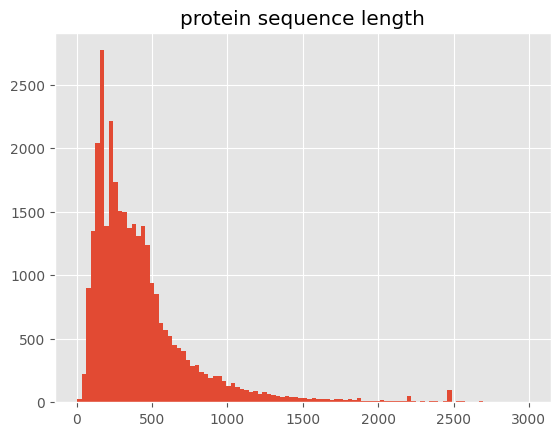

In [15]:
import matplotlib.pyplot as plt

lengths   = data['protein_sequence'].apply(lambda x:len(x))
plt.style.use('ggplot')
values= lengths.values
values = values[values<3000]
info = plt.hist(values, bins = 100)
info = plt.title('protein sequence length')

print(lengths.describe())

In [16]:
data.head()

,seq_id,protein_sequence,pH,data_source,tm
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5


In [17]:
data['length'] =  data['protein_sequence'].apply(lambda x:len(x))
#data = data.sort_values(by= 'length' , axis=1, ascending=False ,  inplace = False)
data.to_csv('with_length.csv',index=False)

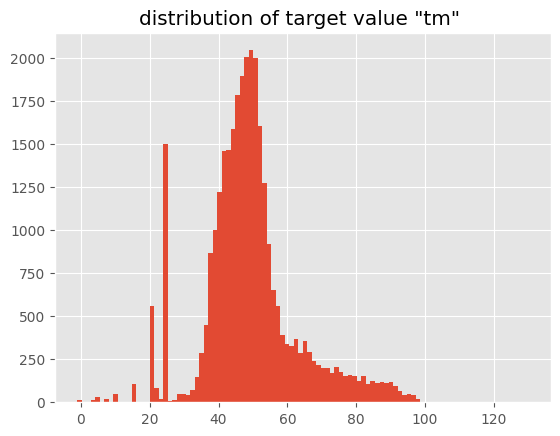

In [18]:
plt.style.use('ggplot')
values= data['tm'].values
info = plt.hist(values, bins = 100)
info = plt.title('distribution of target value "tm" ')

findfont: Font family ['Source Han Serif SC'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Source Han Serif SC'] not found. Falling back to DejaVu Sans.


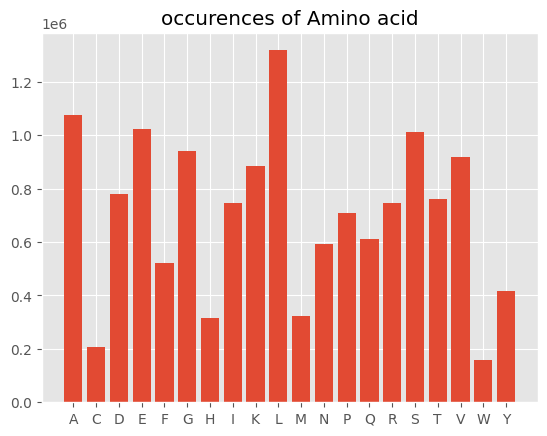

In [19]:
# distribution of 氨基酸

plt.rcParams['font.family'] = 'Source Han Serif SC'
plt.style.use('ggplot')

from collections import Counter
counter = Counter()

for seq in data['protein_sequence'].values.tolist():
    counter.update(seq)

labels , values  = [] , []
items = sorted(counter.items() , key = lambda x:x[0],reverse = False)
for k,v in items:
    labels.append(k)
    values.append(v)

info = plt.title('occurences of Amino acid')
info = plt.bar(labels,values)